<a href="https://colab.research.google.com/github/ABPonciano/imersao-dados-desafio-final/blob/main/Projeto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Modelo classificador de mecanismos de ação de drogas experimentais**


## Glossário

**1. Introdução**

**2. Importação das bibliotecas e bases de dados**

**3. Exploração dos dados**

**4. Criando o modelo**

**5. Análise dos resultados obtidos**

**6. Conclusões**

**7. Referencias bibliográficas**

## 1.Introdução

A industria farmacêutica está sempre pesquisando novos compostos e medicamentos para tratamentos diversos, e para isso são feitos centenas de milhares de experimentos de diferentes compostos em diferentes tipos de células.

Neste projeto, iremos trabalhar com o resultado de diversos experimentos e nestes experimentos foram aplicados diferentes drogas, por diferentes períodos de tempo e em diferentes doses, além disso, temos as as expressões gênicas identificadas em 772 gênes diversos e mostram numericamente como aquele experimento agiu nesses gênes. E também temos as reações desses experimentos em 100 diferentes linhagens celulares.

Também trabalharemos com uma base de resultados que registra os tipos de mecanismos de ação ativados por cada experimento. Foram identificados alguns tipos de mecanismo de ação, mas para este estudo focaremos nos tipos: Inibidores, Ativadores, Antagonistas, e Agonistas.

Em uma explicação para leigos, podemos definir:

**-Inibidores:** Vai inibir a ação de alguma coisa (por exemplo: enzima ou proteína) no organismo.

**-Ativador:** É o oposto do inibidor, e vai ativar a açõ de algo.

**-Antagonista:** Vai agir em um receptor celular agindo como um bloqueador desse receptor.

**-Agonista:** É o oposto do antagonista, e vai agir em um receptor celular e ativá-lo para gerar uma ação celular.

O objetivo final desse projeto será criar um modelo de classificação, baseado nos dados disponibilizados, para poder prever se um certo composto terá uma ação inibidora, ativadora, antagonista, agonista, ou se não terá efeito no organismo com base nas expressões gênicas e reações celulares geradas por um composto.

Para isso, utilizaremos ferramentas de machine learning para treinar nosso modelo a identificar esses dados e classificar as drogas de acordo com seu mecanismo de ação.

# 2.Importação das bibliotecas e bases de dados

Antes de tudo é preciso importar as bases de dados que serão utilizadas, além das bibliotecas que utilizaremos na exploração de dados.

**É importante lembrar que é necessário rodar os códigos na ordem em que aparecem no projeto, senão erros poderão acontecer**

In [ ]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt


#Importação dos Dataframes
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(url_dados, compression="zip")

url_dados_resultados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true'
dados_resultados = pd.read_csv(url_dados_resultados)

# 3.Exploração dos dados

Nesta seção vamos realizar a exploração dos dados para obter o entendimento geral das características dos dados.

## 3.1.Base experimentos

Na primeira base temos os dados relativos aos experimentos realizados com diversas drogas e nela é possível identificar 23.814 linhas e 877 colunas.

Em cada linha está um experimento diferente identificado pela coluna id. Nestes experimentos foram aplicados diferentes drogas (idenficados na coluna "droga"), por diferentes períodos de tempo (identificados na coluna "tempo") e em diferentes doses (indentificadas na coluna "dose"). Além disso, na coluna "tratamento" está informado se a droga ministrada naquele experimento tinha um principio ativo ou apenas fazia parte do  ***controle****.

Nas colunas "g-0" até "g-771" estão as expressões gênicas identificadas em diferentes 772 gênes diferentes e mostram numericamente como aquele experimento agiu nesses gênes. E nas colunas "c-0' até "c-99" estão as reações desses experimentos em diferentes linhagens celulares. 

**Em estudos científicos o controle é de extrema importância, pois serve como uma base de referência para os resultados observados. No caso da nossa base de dados, por se tratarem de compostos sem um príncipio ativo, poderemos confirmar se as expressões gênicas observadas nos experimentos*

In [ ]:
dados

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397

## 3.1.1.Explorando a coluna tratamento

No gráfico abaixo podemos identificar que 7,8% dos experimentos foi realizado como controle e 98,2% recebeu um composto ativo.

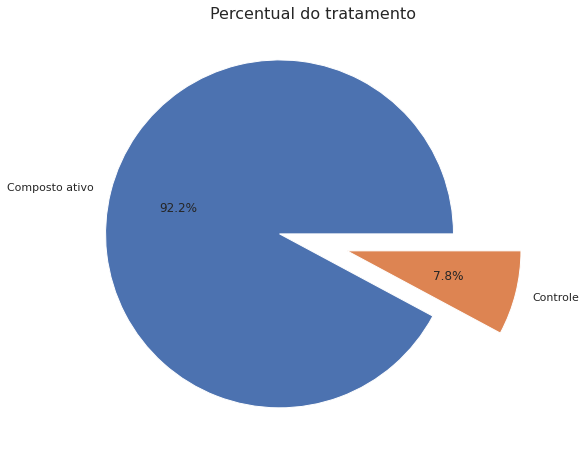

In [ ]:
valores = dados['tratamento'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(x=valores,explode = (0.2, 0.2), autopct="%.1f%%", labels = ['Composto ativo','Controle'],  pctdistance=0.6, startangle=0)
plt.title("Percentual do tratamento", fontsize = 16)
plt.show()

## 3.1.2.Explorando a coluna tempo

Já no gráfico abaixo podemos observar que a distribuição dos tempos é praticamente proporcional entre os períodos de 24, 48 e 72 horas, com uma leve prevalência de experimentos com 48 horas.

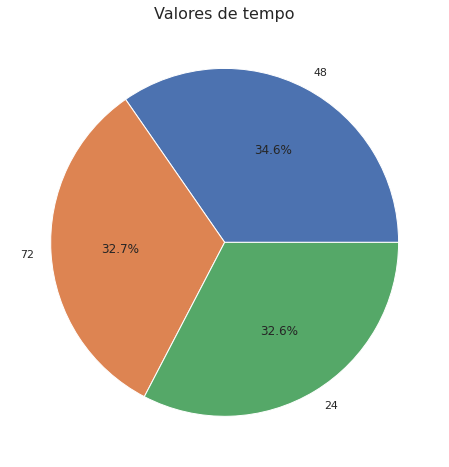

In [ ]:
valores_tempo = dados['tempo'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(x=valores_tempo, autopct="%.1f%%", labels = ['48','72','24'],  pctdistance=0.6, startangle=0)
plt.title("Valores de tempo", fontsize = 16)
plt.show()

## 3.1.3.Explorando a coluna dose

No gráfico abaixo a distribuição de doses também respeita uma proporcionalidade entre as doses.

Essas porcentagens iguais (observadas na variável "tempo" e "dose") é totalmente comum em estudos ciêntificos pois busca a avaliação por igual dessas variáveis.

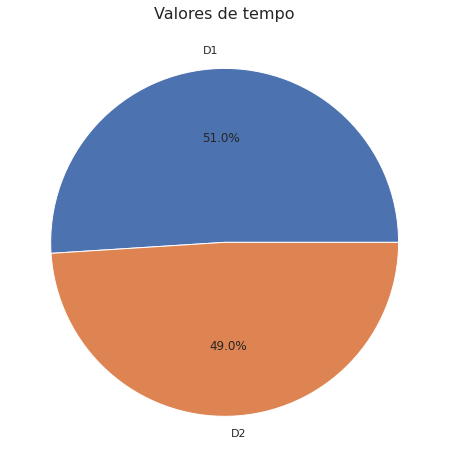

In [ ]:
valores_dose = dados['dose'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(x=valores_dose, autopct="%.1f%%", labels = ['D1','D2'],  pctdistance=0.6, startangle=0)
plt.title("Valores de tempo", fontsize = 16)
plt.show()

## 3.2.Explorando a base de resultados

Na base de resultados podemos identificar o resultado de cada experimento pela coluna "id" e todos os 206 mecanismos de ação estudados nesse experimento. Para cada experimento (linha) é possível identificar qual mecanismo de ação ele ativou. Na tabela, os valores em 0 significam que não houve ativação daquele mecanismo, e os valores em 1 significa que houve ativação daquele mecanismo.

In [ ]:
dados_resultados

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23810,id_fffb70c0c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23811,id_fffc1c3f4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23812,id_fffcb9e7c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
list(dados_resultados.columns.values)

['id',
 '5-alpha_reductase_inhibitor',
 '11-beta-hsd1_inhibitor',
 'acat_inhibitor',
 'acetylcholine_receptor_agonist',
 'acetylcholine_receptor_antagonist',
 'acetylcholinesterase_inhibitor',
 'adenosine_receptor_agonist',
 'adenosine_receptor_antagonist',
 'adenylyl_cyclase_activator',
 'adrenergic_receptor_agonist',
 'adrenergic_receptor_antagonist',
 'akt_inhibitor',
 'aldehyde_dehydrogenase_inhibitor',
 'alk_inhibitor',
 'ampk_activator',
 'analgesic',
 'androgen_receptor_agonist',
 'androgen_receptor_antagonist',
 'anesthetic_-_local',
 'angiogenesis_inhibitor',
 'angiotensin_receptor_antagonist',
 'anti-inflammatory',
 'antiarrhythmic',
 'antibiotic',
 'anticonvulsant',
 'antifungal',
 'antihistamine',
 'antimalarial',
 'antioxidant',
 'antiprotozoal',
 'antiviral',
 'apoptosis_stimulant',
 'aromatase_inhibitor',
 'atm_kinase_inhibitor',
 'atp-sensitive_potassium_channel_antagonist',
 'atp_synthase_inhibitor',
 'atpase_inhibitor',
 'atr_kinase_inhibitor',
 'aurora_kinase_inhibit

## 3.2.1.Classificando os mecanismos de ação

No código acima foi listados todos os mecanismos estudados, e podemos observar que há muitos tipos, então, para esse estudo faremos a separação dos mecanismos de ação em 4 categorias. Então o escopo de estudo será os tipos: **inibidores**, **ativadores**, **antagonistas** e **agonistas**.

Qualquer outro tipo de efeito que não seja esses listados, serão classificados como sem efeito, indicando que aquele experimento não teve efeito inibidor, ativador, antagonista ou agonista.

Os códigos abaixo fazem exatamente isso, separam diferentes dataframes de acordo com o sufixo do mecanismo de ação. (Por exemplo: o mecanismo "5-alpha_reductase_inhibitor" é classificado como inibidor pelo sufixo "_inhibitor")

In [ ]:
#Cria listas baseados nos sufixos dos mecanismos de ação 

lista_inibidor = [sufixo for sufixo in dados_resultados if sufixo.endswith('_inhibitor')]
lista_ativador = [sufixo for sufixo in dados_resultados if sufixo.endswith('_activator')]
lista_antagonista = [sufixo for sufixo in dados_resultados if sufixo.endswith('_antagonist')]
lista_agonista = [sufixo for sufixo in dados_resultados if sufixo.endswith('_agonist')]

#Adiciona id na posição 0 da lista

lista_inibidor.insert(0,'id')
lista_ativador.insert(0,'id')
lista_antagonista.insert(0,'id')
lista_agonista.insert(0,'id')

#Filtra e salva em outros dataframes somente os dados para cada tipo de mecanismo de ação

dados_inibidor = dados_resultados.loc[:,lista_inibidor]
dados_ativador = dados_resultados.loc[:,lista_ativador]
dados_antagonista = dados_resultados.loc[:,lista_antagonista]
dados_agonista = dados_resultados.loc[:,lista_agonista]


In [ ]:
#Cria uma coluna com a quantidade de inibidores ativos e outra com verdadeiro ou falso mostrando se foi ativo algum inibidor

dados_inibidor['n_inibidor'] = dados_inibidor.drop('id', axis = 1).sum(axis=1)
dados_inibidor['inibidor'] = (dados_inibidor['n_inibidor'] != 0)
dados_inibidor

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholinesterase_inhibitor,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,angiogenesis_inhibitor,aromatase_inhibitor,atm_kinase_inhibitor,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,autotaxin_inhibitor,bacterial_30s_ribosomal_subunit_inhibitor,bacterial_50s_ribosomal_subunit_inhibitor,bacterial_cell_wall_synthesis_inhibitor,bacterial_dna_gyrase_inhibitor,bacterial_dna_inhibitor,bacterial_membrane_integrity_inhibitor,bcl_inhibitor,bcr-abl_inhibitor,beta_amyloid_inhibitor,bromodomain_inhibitor,btk_inhibitor,calcineurin_inhibitor,carbonic_anhydrase_inhibitor,casein_kinase_inhibitor,catechol_o_methyltransferase_inhibitor,cdk_inhibitor,chk_inhibitor,cholesterol_inhibitor,coagulation_factor_inhibitor,cyclooxygenase_inhibitor,cytochrome_p450_inhibitor,dihydrofolate_reductase_inhibitor,dipeptidyl_peptidase_inhibitor,dna_inhibitor,...,nitric_oxide_production_inhibitor,nitric_oxide_synthase_inhibitor,norepinephrine_reuptake_inhibitor,p38_mapk_inhibitor,p-glycoprotein_inhibitor,parp_inhibitor,pdgfr_inhibitor,pdk_inhibitor,phosphodiesterase_inhibitor,phospholipase_inhibitor,pi3k_inhibitor,pkc_inhibitor,prostaglandin_inhibitor,proteasome_inhibitor,protein_kinase_inhibitor,protein_phosphatase_inhibitor,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,raf_inhibitor,ras_gtpase_inhibitor,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_reuptake_inhibitor,sodium_channel_inhibitor,src_inhibitor,syk_inhibitor,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tnf_inhibitor,topoisomerase_inhibitor,tropomyosin_receptor_kinase_inhibitor,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,wnt_inhibitor,n_inibidor,inibidor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.0,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,False
23810,id_fffb70c0c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,False
23811,id_fffc1c3f4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,False
23812,id_fffcb9e7c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,True


In [ ]:
#Cria uma coluna com a quantidade de inibidores ativos e outra com verdadeiro ou falso mostrando se foi ativo algum ativador

dados_ativador['n_ativador'] = dados_ativador.drop('id', axis = 1).sum(axis=1)
dados_ativador['ativador'] = (dados_ativador['n_ativador'] != 0)
dados_ativador

,id,adenylyl_cyclase_activator,ampk_activator,caspase_activator,nrf2_activator,potassium_channel_activator,n_ativador,ativador
0,id_000644bb2,0,0,0,0,0,0,False
1,id_000779bfc,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,False
3,id_0015fd391,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,0,0,0,0,0,0,False
23810,id_fffb70c0c,0,0,0,0,0,0,False
23811,id_fffc1c3f4,0,0,0,0,0,0,False
23812,id_fffcb9e7c,0,0,0,0,0,0,False


In [ ]:
#Cria uma coluna com a quantidade de inibidores ativos e outra com verdadeiro ou falso mostrando se foi ativo algum antagonista

dados_antagonista['n_antagonista'] = dados_antagonista.drop('id', axis = 1).sum(axis=1)
dados_antagonista['antagonista'] = (dados_antagonista['n_antagonista'] != 0)
dados_antagonista

,id,acetylcholine_receptor_antagonist,adenosine_receptor_antagonist,adrenergic_receptor_antagonist,androgen_receptor_antagonist,angiotensin_receptor_antagonist,atp-sensitive_potassium_channel_antagonist,cannabinoid_receptor_antagonist,cc_chemokine_receptor_antagonist,cck_receptor_antagonist,cholinergic_receptor_antagonist,dopamine_receptor_antagonist,estrogen_receptor_antagonist,gaba_receptor_antagonist,glutamate_receptor_antagonist,histamine_receptor_antagonist,leukotriene_receptor_antagonist,mineralocorticoid_receptor_antagonist,neuropeptide_receptor_antagonist,opioid_receptor_antagonist,orexin_receptor_antagonist,potassium_channel_antagonist,ppar_receptor_antagonist,progesterone_receptor_antagonist,prostanoid_receptor_antagonist,retinoid_receptor_antagonist,serotonin_receptor_antagonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,tachykinin_antagonist,tlr_antagonist,transient_receptor_potential_channel_antagonist,trpv_antagonist,n_antagonista,antagonista
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,True
23810,id_fffb70c0c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
23811,id_fffc1c3f4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
23812,id_fffcb9e7c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False


In [ ]:
#Cria uma coluna com a quantidade de inibidores ativos e outra com verdadeiro ou falso mostrando se foi ativo algum agonista

dados_agonista['n_agonista'] = dados_agonista.drop('id', axis = 1).sum(axis=1)
dados_agonista['agonista'] = (dados_agonista['n_agonista'] != 0)
dados_agonista

,id,acetylcholine_receptor_agonist,adenosine_receptor_agonist,adrenergic_receptor_agonist,androgen_receptor_agonist,benzodiazepine_receptor_agonist,cannabinoid_receptor_agonist,corticosteroid_agonist,dopamine_receptor_agonist,estrogen_receptor_agonist,fatty_acid_receptor_agonist,gaba_receptor_agonist,glucocorticoid_receptor_agonist,glutamate_receptor_agonist,gonadotropin_receptor_agonist,histamine_receptor_agonist,imidazoline_receptor_agonist,lxr_agonist,nicotinic_receptor_agonist,opioid_receptor_agonist,ppar_receptor_agonist,progesterone_receptor_agonist,retinoid_receptor_agonist,serotonin_receptor_agonist,sigma_receptor_agonist,sphingosine_receptor_agonist,tlr_agonist,trpv_agonist,vitamin_d_receptor_agonist,n_agonista,agonista
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
23810,id_fffb70c0c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,True
23811,id_fffc1c3f4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
23812,id_fffcb9e7c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False


No código abaixo, realizamos a junção das informações dos diferentes dataframes criados com a informação do tipo de mecanismo de ação

In [ ]:
merge_inibidor = pd.merge(dados_resultados, dados_inibidor[['id','n_inibidor' , 'inibidor']], on='id')
merge_ativador = pd.merge(merge_inibidor, dados_ativador[['id','n_ativador', 'ativador']], on='id')
merge_antagonista = pd.merge(merge_ativador, dados_antagonista[['id','n_antagonista' , 'antagonista']], on='id')
merge_final = pd.merge(merge_antagonista, dados_agonista[['id','n_agonista', 'agonista']], on='id')
merge_final

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_inibidor,inibidor,n_ativador,ativador,n_antagonista,antagonista,n_agonista,agonista
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,True,0,False,0,False,0,False
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,False,0,False,0,False,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.0,True,0,False,0,False,0,False
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,False,0,False,0,False,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,False,0,False,0,False,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,False,0,False,1,True,0,False
23810,id_fffb70c0c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,False,0,False,0,False,1,True
23811,id_fffc1c3f4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,False,0,False,0,False,0,False
23812,id_fffcb9e7c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,True,0,False,0,False,0,False


## 3.3.Juntando as informações das duas bases

A seguir, realizaremos a junção das informações da base de experimentos e da base de resultados. Como o que interessa para nós é somente a classificação do tipo de mecanismo de ação obtido na tabela resultados, traremos somente as colunas "id" (para identificar o experimento), "inibidor", "ativador", "antagonista" e "agonista".


In [ ]:
dados_combinados = pd.merge(dados, merge_final[['id', 'inibidor', 'ativador', 'antagonista', 'agonista']], on='id')
dados_combinados

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,inibidor,ativador,antagonista,agonista
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,True,False,False,False
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,False,False,False,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,True,False,False,False
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,False,False,False,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.

## 3.4.Separando os mecanismos de ação

Agora, com base nas informações contidas nas colunas "inibidor", "ativador", "antagonista" e "agonista" faremos a classificação e incluiremos essa informação na coluna "mecanismos_de_acao".

Foi possível observar que alguns experimentos ativavam mais de um tipo de mecanismo, então foi necessário um cuidado maior na classificação.


Na tabela gerada pelo código abaixo é possível verificar o que foi comentado acima. Apesar de não ser de fácil interpretação, a tabela mostra que:

**10473** experimentos não tiveram efeito em nenhuma das 4 categorias do nosso escopo;

**7713** experimentos tiveram efeito do tipo **inibidor**;

**3169** experimentos tiveram efeito do tipo **antagonista**;

**2099** experimentos tiveram efeito do tipo **agonista**;

**91** experimentos tiveram efeito do tipo **ativador**;

**110** experimentos tiveram efeitos dos tipos **inibidor e antagonista**;

**73** experimentos tiveram efeitos dos tipos **inibidor e agonista**;

**62** experimentos tiveram efeitos dos tipos **antagonista e agonista**;
 
**18** experimentos tiveram efeitos dos tipos **inibidor e ativador**;

**6** experimentos tiveram efeitos dos tipos **inibidor, ativador e agonista**.


In [ ]:
pd.crosstab([dados_combinados['inibidor'], dados_combinados['ativador']],[dados_combinados['antagonista'], dados_combinados['agonista']])

antagonista        False       True       
agonista           False True  False True 
inibidor ativador                         
False    False     10473  2099  3169    62
         True         91     0     0     0
True     False      7713    73   110     0
         True         18     6     0     0

## 3.4.1.Criando a coluna "mecanismo_de_acao"

Aqui criaremos uma nova coluna e classificaremos cada experimento de acordo com os tipos de mecanismos vistos na seção 3.4.

In [ ]:
dados_combinados['mecanismo_de_acao'] = ''

In [70]:
import numpy as np

dados_combinados['mecanismo_de_acao'] = np.where((dados_combinados['inibidor']==True) &
                                                 (dados_combinados['ativador']==False) &
                                                 (dados_combinados['antagonista']==False) &
                                                 (dados_combinados['agonista']==False),'inibidor',
                                                 dados_combinados['mecanismo_de_acao'])

dados_combinados['mecanismo_de_acao'] = np.where((dados_combinados['inibidor']==False) &
                                                 (dados_combinados['ativador']==True) &
                                                 (dados_combinados['antagonista']==False) &
                                                 (dados_combinados['agonista']==False),'ativador',
                                                 dados_combinados['mecanismo_de_acao'])

dados_combinados['mecanismo_de_acao'] = np.where((dados_combinados['inibidor']==False) &
                                                 (dados_combinados['ativador']==False) &
                                                 (dados_combinados['antagonista']==True) &
                                                 (dados_combinados['agonista']==False),'antagonista',
                                                 dados_combinados['mecanismo_de_acao'])

dados_combinados['mecanismo_de_acao'] = np.where((dados_combinados['inibidor']==False) &
                                                 (dados_combinados['ativador']==False) &
                                                 (dados_combinados['antagonista']==False) &
                                                 (dados_combinados['agonista']==True),'agonista',
                                                 dados_combinados['mecanismo_de_acao'])

dados_combinados['mecanismo_de_acao'] = np.where((dados_combinados['inibidor']==True) &
                                                 (dados_combinados['ativador']==True) &
                                                 (dados_combinados['antagonista']==False) &
                                                 (dados_combinados['agonista']==False),'inibidor e ativador',
                                                 dados_combinados['mecanismo_de_acao'])

dados_combinados['mecanismo_de_acao'] = np.where((dados_combinados['inibidor']==True) &
                                                 (dados_combinados['ativador']==False) &
                                                 (dados_combinados['antagonista']==False) &
                                                 (dados_combinados['agonista']==True),'inibidor e agonista',
                                                 dados_combinados['mecanismo_de_acao'])

dados_combinados['mecanismo_de_acao'] = np.where((dados_combinados['inibidor']==True) &
                                                 (dados_combinados['ativador']==False) &
                                                 (dados_combinados['antagonista']==True) &
                                                 (dados_combinados['agonista']==False),'inibidor e antagonista',
                                                 dados_combinados['mecanismo_de_acao'])

dados_combinados['mecanismo_de_acao'] = np.where((dados_combinados['inibidor']==True) &
                                                 (dados_combinados['ativador']==True) &
                                                 (dados_combinados['antagonista']==False) &
                                                 (dados_combinados['agonista']==True),'inibidor, ativador e agonista ',
                                                 dados_combinados['mecanismo_de_acao'])

dados_combinados['mecanismo_de_acao'] = np.where((dados_combinados['inibidor']==False) &
                                                 (dados_combinados['ativador']==False) &
                                                 (dados_combinados['antagonista']==True) &
                                                 (dados_combinados['agonista']==True),'antagonista e agonista',
                                                 dados_combinados['mecanismo_de_acao'])

#Preenche os campos vazios como "sem efeito"

dados_combinados['mecanismo_de_acao'] = np.where(dados_combinados['mecanismo_de_acao']=='','sem efeito', 
                                                 dados_combinados['mecanismo_de_acao'])

In [71]:
dados_combinados

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,inibidor,ativador,antagonista,agonista,mecanismo_de_acao
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,True,False,False,False,inibidor
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,False,False,False,False,sem efeito
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,True,False,False,False,inibidor
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,False,False,False,False,sem efeito
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,False,False,False,False,sem efeito
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-

## 3.5.Analisando os tipos de mecanismos de ação

Na lista abaixo temos todos os tipos de mecanismos e as suas respectivas quantidades. 

Podemos observar que as quantidades tiradas da tabela da seção 3.4 estavam corretas. 

In [72]:
dados_combinados['mecanismo_de_acao'].value_counts()

sem efeito                        10473
inibidor                           7713
antagonista                        3169
agonista                           2099
inibidor e antagonista              110
ativador                             91
inibidor e agonista                  73
antagonista e agonista               62
inibidor e ativador                  18
inibidor, ativador e agonista         6
Name: mecanismo_de_acao, dtype: int64

## 3.5.1.Analisando os tipos mais decorrentes

Podemos observar no gráfico abaixo que grande maioria dos experimentos tiveram resultados dos tipos sem efeito ou com efeito inibidor, e um número muito baixo de experimentos obteve efeito dos tipo ativador e dos tipos inibidor e antagonista combinados.

As outras combinações obtiveram quantidades insignificantes, portanto não foi mostrado no gráfico.

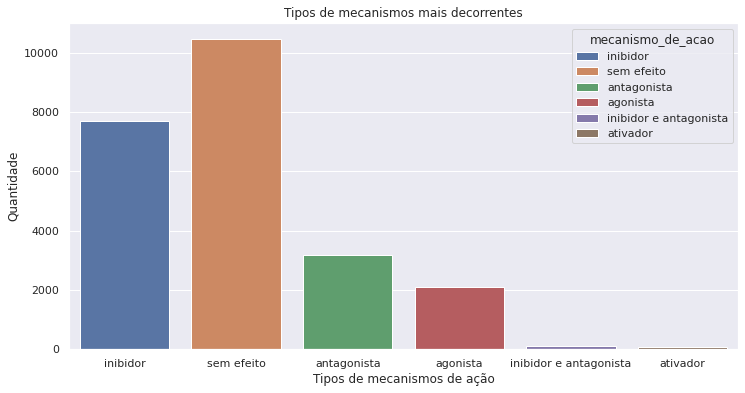

In [81]:
#Grava os 5 tipos mais comuns em cod_mecanismos

cod_mecanismos = dados_combinados['mecanismo_de_acao'].value_counts().index[0:6]
seis_tipos = dados_combinados.query('mecanismo_de_acao in @cod_mecanismos')

#Plota o gráfico de barras com os 6 tipos mais decorrentes
plt.figure(figsize=(12,6))
ax = sns.countplot(x='mecanismo_de_acao', data = seis_tipos, hue ='mecanismo_de_acao', dodge=False )
ax.set_title('Tipos de mecanismos mais decorrentes')   
plt.xlabel('Tipos de mecanismos de ação')
plt.ylabel('Quantidade')
plt.show()

# 4.Criando o modelo

Nesta seção, utilizaremos a técnica de machine learning chamada florestas aleatórias para criar um modelo capaz de classificar o tipo de mecanismo de ação no organismo de acordo com as expressões gênicas nos gênes identificados como g-0 até o g-771 e das reações nas linhagens celulares identificadas como c-0 até c-99.

A técnica de florestas aleatórias é uma evolução da técnica chamada árvores de decisão. A árvore de decisão, de forma bem simplificada, é que um fluxorama de decisão definido por parâmetros que decidirão algo, essas decisões vão formando ramificações parecidas com galhos de uma árvore a cada decisão (por isso o nome árvore de decisão), e em cada ponta se encontra uma classificação ou decisão.

As florestas aleátorias se baseam na criação aleatória de diversas árvores de decisões com os parâmetros de entrada de um modelo para classificar uma saída da melhor maneira possível.


## 4.1.Definindo o escopo e separando os dados

O modelo vai classificar o efeito da droga em 5 tipos de mecanismos de ação: inibidor, ativador, antagonista, agonista e sem efeito. Então, o primeiro passo é filtrarmos as linhas de experimentos que tiveram efeitos combinados, por exemplo "inibidor e antagonista", pois acredito que esses casos estão fora do escopo desse projeto e que possam confundir o modelo criado.

No dataframe "dados_filtrados" selecionamos somente os experimentos que tiveram um efeito entre os 5 definidos acima.



In [82]:
dados_filtrados = dados_combinados[(dados_combinados['mecanismo_de_acao'] == 'sem efeito') |
                                   (dados_combinados['mecanismo_de_acao'] == 'inibidor') | 
                                   (dados_combinados['mecanismo_de_acao'] == 'antagonista') | 
                                   (dados_combinados['mecanismo_de_acao'] == 'ativador') |
                                   (dados_combinados['mecanismo_de_acao'] == 'agonista')]
dados_filtrados

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,inibidor,ativador,antagonista,agonista,mecanismo_de_acao
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,True,False,False,False,inibidor
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,False,False,False,False,sem efeito
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,True,False,False,False,inibidor
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,False,False,False,False,sem efeito
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,False,False,False,False,sem efeito
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-

## 4.2.Separando os dados de treino e teste

Para a criação de um modelo de machine learning é preciso treiná-lo com dados reais para que em uma situação real ele responda da maneira mais correta possível. Então, primeiro o modelo é treinado com entradas e saídas e com isso ele vai aprendendo a identificar saídas de acordo com as entradas.

No nosso modelo temos:

**Entradas:** Expressões gênicas (g-0 a g-771) e reações celulares (c-0 a c99).

**Saída:** Tipo de mecanismo de ação.

E a base de dados que utilizaremos é a definida no nosso escopo "dados_filtrados". E para testarmos a taxa de acerto do nosso modelo, precisamos definir uma amostra para teste. 

No teste, serão informados os dados de entrada e o modelo, de acordo com essa entrada, dará um resposta de saída, e então essa saída será comparada com o saída real e assim poderemos medir a taxa de acerto do nosso modelo.

No código abaixo está sendo feita essa separação da nossa base em treino (80% da amostra) e teste (20% da amostra). 

Essa amostras são estratificadas pela mecanismo de ação, ou seja, a amostra de teste terá 20% de cada tipo de mecanismo de ação para testar.

In [83]:
from sklearn.model_selection import train_test_split
x = dados_filtrados.drop(['id','tratamento','tempo','dose', 'droga','inibidor','ativador','antagonista','agonista','mecanismo_de_acao'], axis=1)
y = dados_filtrados['mecanismo_de_acao']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 234 )

## 4.3.Treinamento e teste do modelo

No código abaixo, foi realizado o treinamento e teste do modelo de classificação que retornou uma taxa de acerto de 56,38%

In [84]:
from sklearn.ensemble import RandomForestClassifier
modelo_arvore_aleatoria = RandomForestClassifier()
modelo_arvore_aleatoria.fit(x_treino, y_treino)
modelo_arvore_aleatoria.score(x_teste, y_teste)

0.5638139732427266

# 5.Análise dos resultados obtidos

Na seção anterior observamos que a taxa de acerto do nosso modelo foi de 56,38%, aparentemente é uma taxa baixa de acerto, mas para analisarmos isso é possível comparar esse resultado com o resultado de um modelo dummy.

Esse modelo dummy seria um modelo mais simples possível de classificação, utilizaremos o modelo baseado na maior frequência, ou seja, o modelo vai simplesmente classificar tudo como a saída mais frequente e veremos qual a taxa de acerto desse modelo.

## 5.1.Construindo um modelo dummy

No código abaixo construímos nosso modelo dummy e observamos que a taxa de acerto dele é de 44,46%. Ou seja, somente chutando o tipo de mecanismo de ação como o mais frequente (sem efeito) esse modelo obteve essa taxa de acerto.

Com isso, percebemos que apesar de nosso modelo ser um pouco melhor, ele ainda tem uma taxa de acerto baixa (56,38%).

In [86]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)

0.44468039923550645

# 6.Conclusões

Com a criação do nosso modelo que utilizou a técnica de florestas aleatórias, obtivemos uma taxa de acerto de 56,38% para a classificação do tipo de mecanismo de ação das drogas baseado nas expressões gênicas e reações celulares da nossa base de dados. Para avaliação desse número, foi utilizado um modelo dummy para comparação, e esse modelo obteve uma taxa de acerto de 44,46%.

Portanto, nosso modelo conseguiu ser um pouco mais eficiente na sua classificação, mas ainda é muito baixo para ser colocado em produção. 

Os motivos para essa taxa de acerto baixa, pode ser devido a imprevisibilidade dos mecanismos de ação no organismo, e a falta de relação entre as entradas e saídas do nosso modelo. 



#7.Referencias bibliográficas

https://seaborn.pydata.org/index.html

https://scikit-learn.org/stable/index.html

https://matplotlib.org/

https://numpy.org/

https://pt.wikipedia.org/wiki/Agonista_(bioqu%C3%ADmica)

https://siteantigo.portaleducacao.com.br/conteudo/artigos/farmacia/inibicao-enzimatica/56533

https://datascience.eu/pt/programacao/entendendo-os-classificadores-de-florestas-aleatorias-em-python/